# **Regression Analysis**
**The goal** is to build a multiple linear regression model and evaluate the model for ride fares based on a variety of variables.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [3]:
# Check for data type
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [4]:
# Check for missing data
df0.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [5]:
# Check for duplicates
df0.duplicated().sum()

0

In [6]:
# Check for unusual data
df0.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


In [7]:
# Check unusual data size
mask = ((df0["fare_amount"] < 0) | (df0["extra"] < 0) | (df0["mta_tax"] < 0) | (df0["improvement_surcharge"] < 0) | (df0["total_amount"] < 0))
print("total data size: ", len(df0))
print("Unusual data size: ", len(df0[mask]))
print("Unusual data size porpotion: ", len(df0[mask])/len(df0))

total data size:  22699
Unusual data size:  14
Unusual data size porpotion:  0.0006167672584695361


Note: Identified some unexpected data points (e.g., negative fare amounts). Given their limited quantity, we opted to remove them to minimize their impact on following analysis.

In [8]:
# Remove unusual data
df = df0[~mask]
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.268500e+04,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000
mean,5.675861e+07,1.555962,1.642231,2.914952,1.043244,162.421732,161.544545,1.335552,13.041876,0.333723,0.498038,1.836914,0.312734,0.299921,16.328490
std,3.274427e+07,0.496869,1.285034,3.653698,0.708122,66.632736,70.136002,0.493288,13.212569,0.462812,0.031257,2.801119,1.399622,0.004878,16.068902
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.852087e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537404e+07,2.000000,2.000000,3.070000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Note: Some things stand out from this table of summary statistics. For instance, there are clearly some outliers in several variables, like `tip_amount` (200) and `total_amount` (1,200). Also, a number of the variables, such as mta_tax, seem to be almost constant throughout the data, which would imply that they would not be expected to be very predictive.

### Task 2b. Convert pickup & dropoff columns to datetime


In [9]:
# Check the format of the data
df[["tpep_pickup_datetime","tpep_dropoff_datetime"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22685 entries, 0 to 22698
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tpep_pickup_datetime   22685 non-null  object
 1   tpep_dropoff_datetime  22685 non-null  object
dtypes: object(2)
memory usage: 531.7+ KB


In [10]:
# Convert datetime columns to datetime
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
df[["tpep_pickup_datetime","tpep_dropoff_datetime"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22685 entries, 0 to 22698
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   22685 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  22685 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 531.7 KB


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [11]:
# Create `duration` column
df["duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Task 2d. Use Box plots to check outliers

Check outliers for each feature: `trip_distance`, `fare_amount`, `duration`.

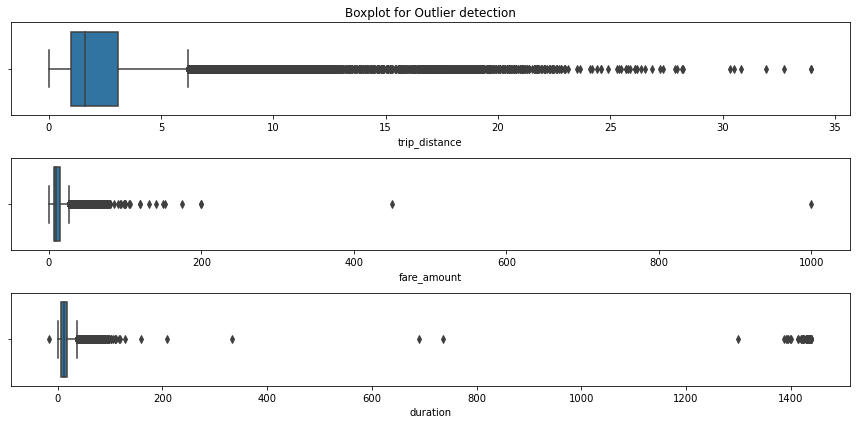

In [12]:
#Create box plots
df_long = pd.melt(df, value_vars=['trip_distance', 'fare_amount', 'duration'], var_name='Columns', value_name='Values')
fig, ax = plt.subplots(3, 1, figsize=(12, 6))
sns.boxplot(x='trip_distance', data=df, ax=ax[0])
ax[0].set_title('Boxplot for Outlier detection')
sns.boxplot(x='fare_amount', data=df, ax=ax[1])
sns.boxplot(x='duration', data=df, ax=ax[2])
plt.tight_layout()
plt.show()

Note: 
1. All three variables contain outliers. Some are extreme, but others not so much.
2. It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for `fare_amount` and `duration` definitely seem to have problematic outliers on the higher end.
3. There are trip distances of 0, let's investigate further to determine if these represent errors in the data or if they're extremely short trips that were rounded down to zero."

### Task 2e. Imputations

#### `trip_distance` outliers

Sort the column values, eliminate duplicates, and inspect the least 10 values. Check if they are rounded values or precise values?

In [13]:
a = set(df["trip_distance"])
a_sort = sorted(a)
a_sort[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

Note: The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. 
Next, check if there are enough zero values in the data to pose a problem?

In [14]:
# Calculate the count of rides where the trip_distance is zero.
mask = df["trip_distance"] == 0
(df[mask].size)/(df.size)

0.0064800528983910075

Note: 0.0065 rides is relatively insignificant, but it's unlikely to have much of an effect on the model. Therefore, the trip_distance column will remain untouched with regard to outliers.



#### `fare_amount` outliers

The range of values in the fare_amount column is large. The maximum fare amount in this dataset is nearly 1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is 8. The standard formula of Q3 + (1.5 * IQR) yields 26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of 62.50

In [15]:
df['fare_amount'].describe()

count    22685.000000
mean        13.041876
std         13.212569
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [16]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [17]:
# Impute the maximum value as Q3 + (6 * IQR).
outlier_imputer(['fare_amount'], 6) 

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22685.000000
mean        12.905873
std         10.539517
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers


In [18]:
# Impute the maximum value as Q3 + (6 * IQR).
outlier_imputer(['duration'], 6) 

duration
q3: 18.383333333333333
upper_threshold: 88.68333333333331
count    22685.000000
mean        14.464108
std         11.934861
min          0.000000
25%          6.666667
50%         11.183333
75%         18.383333
max         88.683333
Name: duration, dtype: float64



### Task 3a. Feature engineering

#### Create `mean_distance` and `mean_duration` column

When deployed, the model will not know the `distance` and `duration` of a trip until after the trip occurs, so we cannot train a model that uses this feature. Therefore, we can identify patterns and use those to estimate the duration of future trips. In essence, we're leveraging historical data to generalize about unseen scenarios.

Create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

In [19]:
# Create `pickup_dropoff` column
df["pickup_dropoff"]=df["PULocationID"].apply(str) + " - " + df["DOLocationID"].apply(str)

In [20]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 - 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 - 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 - 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 - 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 - 112


In [21]:
# Caculate the mean duration and mean distance for each group of trips 
grouped_distiance_duration = df[["pickup_dropoff", "trip_distance","duration"]].groupby("pickup_dropoff").mean().reset_index()
grouped_distiance_duration.rename(columns={'trip_distance': 'mean_trip_distance', 'duration': 'mean_duration'}, inplace=True)
grouped_distiance_duration

,pickup_dropoff,mean_trip_distance,mean_duration
0,1 - 1,2.433333,0.466667
1,10 - 148,15.700000,69.366667
2,100 - 1,16.890000,48.183333
3,100 - 100,0.253333,3.130556
4,100 - 107,1.180000,11.200000
...,...,...,...
4166,97 - 65,0.500000,4.483333
4167,97 - 66,1.400000,11.233333
4168,97 - 80,3.840000,23.833333
4169,97 - 90,4.420000,11.766667


In [22]:
# Merge data
df = pd.merge(df, grouped_distiance_duration, on='pickup_dropoff', how='left')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_trip_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 - 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 - 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 - 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 - 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 - 112,4.435000,14.616667


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [23]:
# Create 'day' col
df["day"] = df["tpep_pickup_datetime"].dt.day_name()
# Create 'month' col
df["month"] = df["tpep_pickup_datetime"].dt.month_name()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [24]:
def is_weekday_and_time_range(dt):
  """
  Checks if the datetime object falls on a weekday (not Saturday or Sunday)
  and within the time ranges 06:00-10:00 or 16:00-20:00.

  Args:
      dt (pd.Timestamp): The datetime object to check.

  Returns:
      int: 1 if conditions are met, 0 otherwise.
  """
  # Check weekday (Monday = 0, Sunday = 6)
  if dt.weekday() in [0, 1, 2, 3, 4]:
    # Check time range
    if (dt.hour >= 6 and dt.hour < 10) or (dt.hour >= 16 and dt.hour < 20):
      return 1
  return 0

# Create a new column with 0 or 1 based on conditions
df['rush_hour'] = df['tpep_pickup_datetime'].apply(is_weekday_and_time_range)

# Print the modified DataFrame
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_trip_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 - 231,3.521667,22.847222,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 - 43,3.108889,24.470370,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 - 236,0.881429,7.250000,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 - 97,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 - 112,4.435000,14.616667,Saturday,April,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

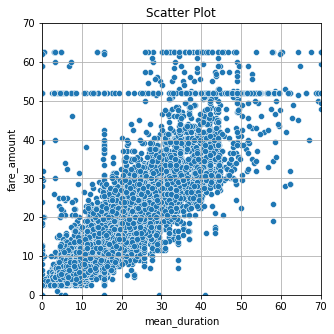

In [25]:
# Create a scatterplot to visualize the relationship between variables of interest
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.scatterplot(x='mean_duration', y='fare_amount', data=df)
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.xlabel("mean_duration")
plt.ylabel("fare_amount")
plt.title("Scatter Plot")
plt.grid(True)
plt.show()

Note: There are two horizontal lines aorune fare amounts of 50 ~ 65, we know that the one of lines represents 62.5 which we imputed for outliers. Next, check the value of the rides in the second horizontal line in the scatter plot.

In [26]:
# Count for each group of fare amount 
mask = df["fare_amount"] >= 50
df["fare_amount"][mask].value_counts().head()

52.0    514
62.5     84
50.5      9
59.0      9
57.5      8
Name: fare_amount, dtype: int64

In [27]:
# Examine the first 30 of the trips which fare amount is 52. 
pd.set_option('display.max_columns', None)
mask = df["fare_amount"] == 52
df[mask].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_trip_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 - 132,19.211667,40.483333,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 - 163,19.229000,52.941667,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 - 132,2.255862,3.021839,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 - 79,19.431667,47.275000,Wednesday,December,0
378,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 - 234,17.654000,49.833333,Sunday,September,0
387,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 - 48,18.761905,58.241270,Tuesday,February,1
405,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 - 88,4.730000,15.616667,Monday,June,0
448,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 - 48,18.761905,58.241270,Thursday,August,0
467,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 - 132,17.096000,42.920000,Tuesday,September,0
519,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 - 148,17.994286,46.340476,Sunday,April,0


Note: It seems that almost all of the trips in the first 30 rows where the fare amount was $52 either begin or end at location 132, and all of them have a RatecodeID of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of  5.76and
 5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate $52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because RatecodeID is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22685 entries, 0 to 22684
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22685 non-null  int64         
 1   VendorID               22685 non-null  int64         
 2   tpep_pickup_datetime   22685 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22685 non-null  datetime64[ns]
 4   passenger_count        22685 non-null  int64         
 5   trip_distance          22685 non-null  float64       
 6   RatecodeID             22685 non-null  int64         
 7   store_and_fwd_flag     22685 non-null  object        
 8   PULocationID           22685 non-null  int64         
 9   DOLocationID           22685 non-null  int64         
 10  payment_type           22685 non-null  int64         
 11  fare_amount            22685 non-null  float64       
 12  extra                  22685 non-null  float64       
 13  m

In [29]:
df2 = df[["VendorID", "passenger_count", "fare_amount", "mean_trip_distance", "mean_duration","rush_hour"]]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22685 entries, 0 to 22684
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   VendorID            22685 non-null  int64  
 1   passenger_count     22685 non-null  int64  
 2   fare_amount         22685 non-null  float64
 3   mean_trip_distance  22685 non-null  float64
 4   mean_duration       22685 non-null  float64
 5   rush_hour           22685 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

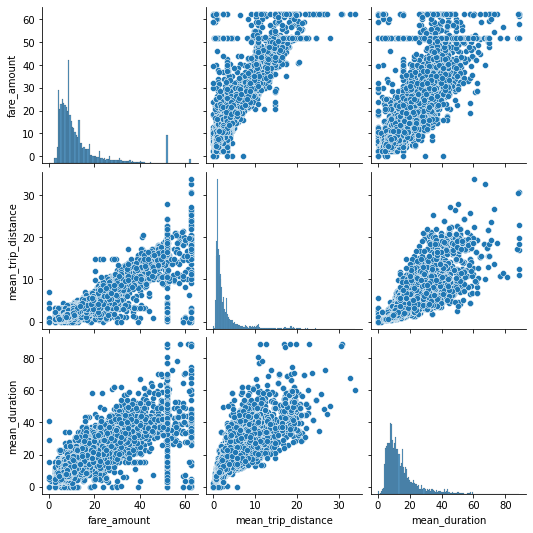

In [30]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[["fare_amount", "mean_trip_distance", "mean_duration"]])
plt.show()

Note: These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [31]:
# Calculate the Pearson correlation matrix
correlation_matrix = df2.corr()
correlation_matrix

,VendorID,passenger_count,fare_amount,mean_trip_distance,mean_duration,rush_hour
VendorID,1.000000,0.266591,0.001721,0.005085,0.002247,-0.002689
passenger_count,0.266591,1.000000,0.015040,0.013476,0.016060,-0.021984
fare_amount,0.001721,0.015040,1.000000,0.910246,0.859106,-0.020344
mean_trip_distance,0.005085,0.013476,0.910246,1.000000,0.874974,-0.039859
mean_duration,0.002247,0.016060,0.859106,0.874974,1.000000,-0.021863
rush_hour,-0.002689,-0.021984,-0.020344,-0.039859,-0.021863,1.000000


Visualize a correlation heatmap of the data.

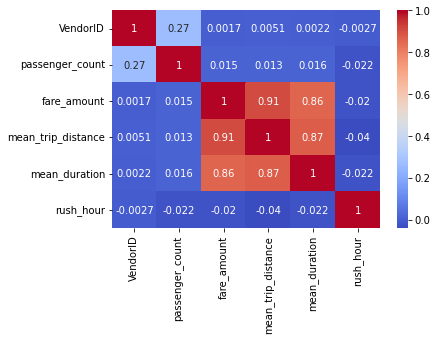

In [32]:
# Create correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Note: `mean_duration` and `mean_distance` are both highly correlated with the target variable of fare_amount They're also both correlated with each other, with a Pearson correlation of 0.87.

Though the highly correlated predictor variables can be bad for linear regression models. However, the prediction itself is more important in this case. Therefore, keep modeling with both variables even though they are correlated. 

### Task 8a. Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [33]:
# Remove the target column from the features
X = df2.drop(columns='fare_amount')

# Set y variable
y = df2[["fare_amount"]]

# Display first few rows
X.head(5)

,VendorID,passenger_count,mean_trip_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [34]:
# Convert VendorID to string
X["VendorID"] = X["VendorID"].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_trip_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [35]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [36]:
# Standardize the X training data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns = X_train.columns
X_train_scaled  

,passenger_count,mean_trip_distance,mean_duration,rush_hour,VendorID_2
0,-0.494910,-0.541089,-0.828269,-0.647327,-1.114396
1,0.288827,0.025611,0.888709,1.544815,-1.114396
2,-0.494910,-0.588687,-0.981131,-0.647327,-1.114396
3,0.288827,0.214159,1.021994,-0.647327,0.897347
4,-0.494910,0.466848,1.182599,-0.647327,0.897347
...,...,...,...,...,...
18143,1.072564,1.120949,0.776948,-0.647327,-1.114396
18144,-0.494910,-0.111455,-0.134779,-0.647327,-1.114396
18145,0.288827,-0.248357,-0.199040,-0.647327,0.897347
18146,-0.494910,-0.576883,-0.505044,-0.647327,-1.114396


In [37]:
# Standardize the X test data
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
X_test_scaled.columns = X_test.columns
X_test_scaled  

,passenger_count,mean_trip_distance,mean_duration,rush_hour,VendorID_2
0,2.511604,1.239032,0.621272,1.516455,0.879180
1,-0.519222,-0.359141,-0.351639,-0.659433,0.879180
2,-0.519222,-0.279944,-0.238440,1.516455,0.879180
3,2.511604,1.302758,0.541919,1.516455,0.879180
4,-0.519222,-0.624814,-0.336398,1.516455,-1.137423
...,...,...,...,...,...
4532,0.238485,0.959190,1.042294,-0.659433,-1.137423
4533,-0.519222,0.853903,0.162423,-0.659433,0.879180
4534,0.238485,-0.248533,0.421542,1.516455,-1.137423
4535,-0.519222,-0.512058,-0.517065,1.516455,-1.137423


### Task 8c. Fit and evaluate model

#### 1st model

In [38]:
# Combine standardized features
data_std_scaled = pd.concat([X_train_scaled, y_train.reset_index()], axis=1) 

# Fit 1st model to the training data
formula = "fare_amount ~ + passenger_count + mean_trip_distance + mean_duration + rush_hour + VendorID_2"
model_1 = sm.formula.ols(formula, data_std_scaled).fit()
print(model_1.summary())

# Calcuate evluation metrics for training data
print("training data")
model_1_predictions = model_1.predict(data_std_scaled)

# Calculate and print r2
model_1_r2 = r2_score(y_train, model_1_predictions)
print(f"R-squared : {model_1_r2:.2f}")
# Calculate and print MAE
model_1_mae = mean_absolute_error(y_train, model_1_predictions)
print(f"Mean Absolute Error (MAE): {model_1_mae:.2f}")
# Calculate and print MSE
model_1_mse = mean_squared_error(y_train, model_1_predictions)
print(f"Mean Squared Error (MSE): {model_1_mse:.2f}")
# Calculate and print RMSE (square root of MSE)
model_1_rmse = np.sqrt(model_1_mse)
print(f"Root Mean Squared Error (RMSE): {model_1_rmse:.2f}")
print()

# Calcuate evluation metrics for testing data
print("Testing data")
test_data_std_scaled = pd.concat([X_test_scaled, y_test.reset_index()], axis=1) 
model_1_test_data_predictions = model_1.predict(test_data_std_scaled)

# Calculate and print r2
model_1_test_data_r2 = r2_score(y_test, model_1_test_data_predictions)
print(f"R-squared : {model_1_r2:.2f}")
# Calculate and print MAE
model_1_test_data_mae = mean_absolute_error(y_test, model_1_test_data_predictions)
print(f"Mean Absolute Error (MAE): {model_1_mae:.2f}")
# Calculate and print MSE
model_1_test_data_mse = mean_squared_error(y_test, model_1_test_data_predictions)
print(f"Mean Squared Error (MSE): {model_1_mse:.2f}")
# Calculate and print RMSE (square root of MSE)
model_1_test_data_rmse = np.sqrt(model_1_test_data_mse)
print(f"Root Mean Squared Error (RMSE): {model_1_test_data_rmse:.2f}")

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 1.912e+04
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        07:35:27   Log-Likelihood:                -51830.
No. Observations:               18148   AIC:                         1.037e+05
Df Residuals:                   18142   BIC:                         1.037e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.8918      0

Note: The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R2 of 0.84 means that 84% of the variance in the fare_amount variable is described by the model.

Consider the `passenger_count` and `VendorID` are not significnat for level of 5%, which revealed that `passenger_count` and `VendorID` have low importance. Therefore, remove these two features and rebuild model to assess if performance improves due to a more focused feature set.

#### 2nd model

In [39]:
# Fit 2nd model to the training data
formula = "fare_amount ~ + mean_trip_distance + mean_duration + rush_hour"
model_2 = sm.formula.ols(formula, data_std_scaled).fit()
print(model_2.summary())

# Calcuate evluation metrics for training data
model_2_predictions = model_2.predict(data_std_scaled)

# Calculate and print r2
model_2_r2 = r2_score(y_train, model_2_predictions)
print(f"R-squared : {model_1_r2:.2f}")
# Calculate and print MAE
model_2_mae = mean_absolute_error(y_train, model_2_predictions)
print(f"Mean Absolute Error (MAE): {model_2_mae:.2f}")
# Calculate and print MSE
model_2_mse = mean_squared_error(y_train, model_2_predictions)
print(f"Mean Squared Error (MSE): {model_2_mse:.2f}")
# Calculate and print RMSE (square root of MSE)
model_2_rmse = np.sqrt(model_2_mse)
print(f"Root Mean Squared Error (RMSE): {model_2_rmse:.2f}")

print()
print("test data")
model_2_test_data_predictions = model_2.predict(test_data_std_scaled)
# Calculate and print r2
model_2_test_data_r2 = r2_score(y_test, model_2_test_data_predictions)
print(f"R-squared : {model_2_r2:.2f}")
# Calculate and print MAE
model_2_test_data_mae = mean_absolute_error(y_test, model_2_test_data_predictions)
print(f"Mean Absolute Error (MAE): {model_2_mae:.2f}")
# Calculate and print MSE
model_2_test_data_mse = mean_squared_error(y_test, model_2_test_data_predictions)
print(f"Mean Squared Error (MSE): {model_2_mse:.2f}")
# Calculate and print RMSE (square root of MSE)
model_2_test_data_rmse = np.sqrt(model_2_test_data_mse)
print(f"Root Mean Squared Error (RMSE): {model_2_test_data_rmse:.2f}")

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 3.186e+04
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        07:35:28   Log-Likelihood:                -51831.
No. Observations:               18148   AIC:                         1.037e+05
Df Residuals:                   18144   BIC:                         1.037e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.8918      0

Note: While removing `passenger_count` and `VendorID` did not result in significant performance improvement, we've opted to retain these features in the first model for the sake of model interpretability. These features provide valuable insights into the factors affecting fare amounts, even if their statistical significance is below the 5% threshold."

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [40]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test["fare_amount"],
                             'predicted': model_1_test_data_predictions.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
295,24.0,23.721717,0.278283
13757,9.5,9.231055,0.268945
4142,11.0,10.371379,0.628621
3015,22.0,23.959979,-1.959979
13845,6.0,7.685661,-1.685661


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

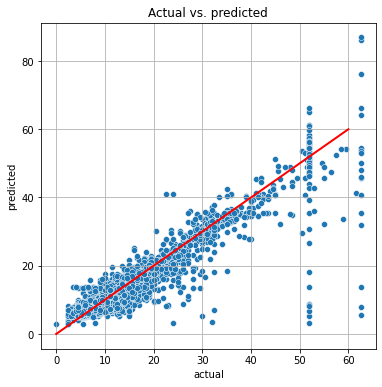

In [41]:
# Create a scatter plot
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='actual', y='predicted', data=results)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("Actual vs. predicted")
plt.grid(True) 
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.show()

Visualize the distribution of the `residuals` using a histogram.

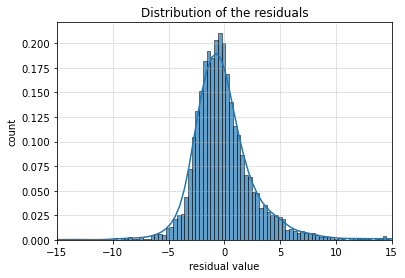

In [42]:
# Create the histogram
sns.histplot(
    data=results,
    x="residual", 
    kde=True, 
    linewidth=0.5,  
    alpha=0.7,  
    stat="density"  
)
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(-15,15)
plt.show()

Note: The distribution of the residuals is approximately normal and has a mean aorund 0. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

Create a scatterplot of `residuals` over `predicted`.

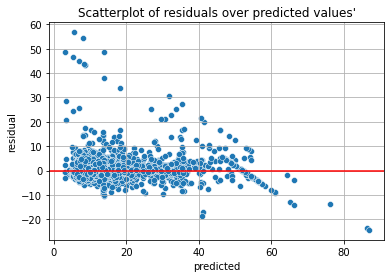

In [43]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.xlabel("predicted")
plt.ylabel("residual")
plt.title("Scatterplot of residuals over predicted values'")
plt.grid(True)
plt.axhline(0, c='red')
plt.show()

Note: The most model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which we know are the imputed maximum of 62.50 and the flat rate of 52 for JFK airport trips.

### Task 9c. Coefficients

In [44]:
# Get the model's coefficients. 
model_1.params

Intercept             12.891818
passenger_count        0.034374
mean_trip_distance     7.163740
mean_duration          2.750466
rush_hour              0.120239
VendorID_2            -0.026912
dtype: float64

In [45]:
# Translate the coefficient of `mean_trip_distance` back to miles instead of standard deviation 
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_trip_distance'].std())
# 2. Divide the model coefficient by the standard deviation
print(7.163740 / X_train['mean_trip_distance'].std())

3.546947522227702
2.019691567215725


The coefficients reveal that `mean_trip_distance` was the feature with the greatest weight in the model's final prediction. And controlling for other variables, **for every +1 change in standard deviation, the fare amount increases by a mean of 7.13**. In intuitive interpretation: **for every 3.57 miles traveled, the fare increased by a mean of 7.13.** In simpler terms: **for every 1 mile traveled, the fare increased by a mean of 2.00**.